In [1]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, QuantileRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score

# SciKit Learn

The scikit-learn or in short [sklearn package](https://scikit-learn.org/stable/) provides a broad collection of data analysis and machine learning tools. These tools basically cover the whole process from data manipulation over fitting different models to the data and evaluating the results. Sklearn is based on **numpy** and may thus require that the data to analyze is provided as an numpy array. Results will also be returned as such arrays.   

The respective modules, i.e. classes and functions of different algorithms, are provided in an API which allows easy application basically without requiring knowledge about how the algorithm itself works. It goes without mentioning, that you should have some basic understanding about the particular strengths of an algorithm and any caveats when fitting a model to extract meaningful results.

In this course, we will present only a small portion of sklearn's functionality and refer to the [API's documentation](https://scikit-learn.org/stable/modules/classes.html).

Sklearn provides a kind of framework syntax for fitting models of different kinds:

- instantiate the respective (algorithm's) object. Here, the hyper parameters and options are set

- fit the data using this object

- evaluate the model or use the model for prediction 

We will now look at some basic procedures for analyzing data using different methods. To load our modules, we import them specifically from the `skikit-learn` (name for installation) package instead of importing the whole package.

## Data manipulation

One of the reasons for the great popularity of the sklearn package is its versatility. It does not only come along with a large amount of machine learning algorithms, among others it also provides various methods which are usually employed before training a machine learning model to the data. More concrete, sklearn provides methods for handling missing data, encoding categorical data and normalizing numerical data. These tasks all are crucial for the succesful training of a machine learning model. 

### Imputation
Many real-world datasets have missing values, marked by blanks, NaNs, or other placeholders, making them incompatible with machine learning algorithms that require numerical values with meaning. A simple approach is to discard rows or columns with missing values, but this can result in valuable data loss. As an alternative, we can impute the missing values, inferring them from the known data, as suggested in the glossary entry on imputation. Note, this potentially introduces a bias to the dataset such that a trade-off between more data and less bias exists.

The easiest way to replace missing values is to replace them with a representative value of the variable, e.g., the mean or median. This can be done with the `SimpleImputer` of the `impute`module as shown in the next cell. 

In [2]:
df = pd.DataFrame(np.arange(1, 13).reshape(3, 4).transpose(), columns = ["x", "y", "z"])
df.iloc[1, 0] = np.nan
df.iloc[2, 1] = np.nan
df.iloc[0, 2] = np.nan

print("Data:")
print(df)

simple_imputer = SimpleImputer(strategy = "mean")
simple_imputer.fit(df)
df_mean_replaced = simple_imputer.transform(df)

print("\nData with mean replacement:")
print(df_mean_replaced)

simple_imputer = SimpleImputer(strategy = "median")
simple_imputer.fit(df)
df_mean_replaced = simple_imputer.transform(df)

print("\nData with median replacement:")
print(df_mean_replaced)

Data:
     x    y     z
0  1.0  5.0   NaN
1  NaN  6.0  10.0
2  3.0  NaN  11.0
3  4.0  8.0  12.0

Data with mean replacement:
[[ 1.          5.         11.        ]
 [ 2.66666667  6.         10.        ]
 [ 3.          6.33333333 11.        ]
 [ 4.          8.         12.        ]]

Data with median replacement:
[[ 1.  5. 11.]
 [ 3.  6. 10.]
 [ 3.  6. 11.]
 [ 4.  8. 12.]]


If a variable is categorical, we can use the most frequent strategy to replace its missing values.

In [3]:
df = pd.DataFrame([["a"], ["b"], ["a"], [np.nan]], columns = ["categories"])
print("Data:")
print(df)
simple_imputer = SimpleImputer(strategy = "most_frequent")
df_most_frequent = simple_imputer.fit_transform(df)
print("\nData with most frequent replacement:")
print(df_most_frequent)

Data:
  categories
0          a
1          b
2          a
3        NaN

Data with most frequent replacement:
[['a']
 ['b']
 ['a']
 ['a']]


In more realistic scenarios, we have numerical and categorical features in a data set, such that different strategies need to be applied for each feature. This can be done by using the `ColumnTransformer` as demonstrated in the cell below. 

In [4]:
df = pd.DataFrame(np.arange(1, 13).reshape(3, 4).transpose(), columns = ["x", "y", "z"])
df.iloc[1, 0] = np.nan
df.iloc[2, 1] = np.nan
df.iloc[0, 2] = np.nan
df.loc[:, "categorical"] = ["a", "b", "a", np.nan]
print("Data:")
print(df)
column_transformer = ColumnTransformer(
    transformers = [
        ("numerical", SimpleImputer(strategy = "median"), ["x", "y", "z"]),
            ("categorical", SimpleImputer(strategy = "most_frequent"), ["categorical"])
    ]
)

df_replaced = column_transformer.fit_transform(df)
print("\nData with median and most frequent replacement:")
print(df_replaced)

Data:
     x    y     z categorical
0  1.0  5.0   NaN           a
1  NaN  6.0  10.0           b
2  3.0  NaN  11.0           a
3  4.0  8.0  12.0         NaN

Data with median and most frequent replacement:
[[1.0 5.0 11.0 'a']
 [3.0 6.0 10.0 'b']
 [3.0 6.0 11.0 'a']
 [4.0 8.0 12.0 'a']]


Another and eventually more sophisticated way to impute missing data is given by the `IterativeImputer` which iteratively treats one variable as a dependent variable, builds a model to estimate its value by means of the other variables and replaces missing values with predictions from this model. This is done for all variables. 

### Encoding categorical data

Once no missing values are left, we can and sometimes must preprocess data. Categorical data is often provided by strings or numerical values which are nominal, thus, ordering them or interpreting the distance between these values is meaningless. For ordinal data, we can use the `OrdinalEncoder` which transforms strings to numerical values in ordinal order. It should be noted that by default, the categories are asserted by alphabetical order of the original values. This can be changed by setting the categories explicitly as shown below.

In [5]:
ordinal_features = [["one"], ["two"], ["three"]]
ordinal_encoder = OrdinalEncoder()
print("default behavior: ")
print(ordinal_encoder.fit_transform(ordinal_features))
print("\nwith explicit order:")
ordinal_encoder = OrdinalEncoder(categories=[["one", "two", "three"]])
print(ordinal_encoder.fit_transform(ordinal_features))

default behavior: 
[[0.]
 [2.]
 [1.]]

with explicit order:
[[0.]
 [1.]
 [2.]]


Given the feature is on a nominal scale, it should not be transformed to an ordinal feature. Instead it might be better represented by one-hot encoding. Given a feature has $K$ categories, its one-hot encoded version is represented by a $K$ dimensional vector which has zeros everywhere except at the position which represents category $k$. 

In [6]:
nominal_features = [["female"], ["male"], ["female"]]
onehot_encoder = OneHotEncoder(sparse_output = False)
onehot_encoder.fit_transform(nominal_features)

array([[1., 0.],
       [0., 1.],
       [1., 0.]])

One-hot encoding is very similar to what is called dummy encoding. However, for dummy encoding, one decides to use one of the $K$ categories as default such that we only need $K-1$ binary variables to represent all categories. This can also be done with the `OneHotEncoder` by setting the drop argument accordingly. 

In [7]:
onehot_encoder = OneHotEncoder(drop = "first", sparse_output = False)
onehot_encoder.fit_transform(nominal_features)

array([[0.],
       [1.],
       [0.]])

One-hot encoding (and sometimes also categorical encoding) may be problematic if the original feature as a large amount of different categories. This leads to a high dimensional feature space after transformation. In such cases, it may be a better strategy to encode up to a maximum number of categories and put the remaining ones into a single category. This can be done by setting the `max_categories` argument. 

In [8]:
nominal_features = np.array([["one"] * 3 + ["two"] * 5 + ["three"] * 4 + ["four"] * 2], dtype = object).transpose()
onehot_encoder = OneHotEncoder(max_categories = 3, sparse_output = False)
onehot_encoder.fit_transform(nominal_features)

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

### Comparability of numerical data

Values of numerical feature variables are often on very different numerical ranges. For instance, the number of employees of a company are in the hundreds or thousands, its market capitalization might be in millions or even billions. For some machine learning models it is of great importance that these values are brought to comparable and smaller numerical ranges, otherwise, the algorithm faces numerical issues. Furthermore, leaving numerical values in their raw form, may induce weightings which are not wanted. For instance, if an algorithm uses euclidean distance it will give higher weights to features on higher numerical ranges. Furthermore, comparable numerical ranges can help to improve the comparability of results. 

The most common techniques for bringing numerical features to similar numerical ranges are standardization and min-max scaling, respectively. Both techniques are implemented by the `StandardScaler` and `MinMaxScaler` classes of the `preprocessing` module. The standard scaler estimates the mean and standard deviation of every feature and transforms $x$ by:

$$
z = \frac{x - \hat{\mu}}{\hat{\sigma}}
$$

Min-max scaling is done by determining the minimum and maximum value of feature $x$ and transforming it by:

$$
z = \frac{x - \min(x)}{\max(x) - \min(x)}
$$

This brings all values into the numerical range $[0, 1]$. If another range $[l, u]$ is desired, values can be transformed to it by:

$$
z^{*} = z*(u - l) + l
$$

In [9]:
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
lu_scaler = MinMaxScaler(feature_range = (-3, 3))
x = np.array([[1.], [2.], [3.], [4.]])

print(f"Original data: {x}")
print("\nData after standardization: ")
print(standard_scaler.fit_transform(x))
print("\nData after minmax scaling: ")
print(minmax_scaler.fit_transform(x))
print("\nData after minmax scaling to [-3, 3]: ")
print(lu_scaler.fit_transform(x))

Original data: [[1.]
 [2.]
 [3.]
 [4.]]

Data after standardization: 
[[-1.34164079]
 [-0.4472136 ]
 [ 0.4472136 ]
 [ 1.34164079]]

Data after minmax scaling: 
[[0.        ]
 [0.33333333]
 [0.66666667]
 [1.        ]]

Data after minmax scaling to [-3, 3]: 
[[-3.]
 [-1.]
 [ 1.]
 [ 3.]]


## Supervised learning with sklearn

Taking a quick look [here](https://scikit-learn.org/stable/supervised_learning.html) gives you an overview of implemented supervised learning algorithms in the sklearn package. As you realize, this may be a little too much for detailed discussions in this course which is why we restrict ourselves to a few examples. The good news is that that class definitions for each algorithm are written in a consistent manner which allows you to use the majority of all algorithms in the same way. Supervised learning is a machine learning task where feature variables are used to predict one (or on rare occasions more than one) labeled variable. If this variable is numerical, we face a regression task, in case of a categorical variable, we face a classification task. 

Every supervised learning algorithm needs an array of features $X$ and values for the target variable $y$ as input. Furthermore, more advanced algorithms often can be further calibrated by so called hyperparameters which must be set as well. Let us take a look at the linear regression model and estimate it for the example where we regress Apple's stock returns on the Russell 3000 returns. In this example, Apple's returns are the target variable and the Russell 3000 serves as an approximation of the market portfolio. Roughly, the estimated coefficient can be interpreted as the market beta. 

For all supervised learning algorithms in the sklearn package, we first define an instance of the algorithms class along with its function arguments. Next, we can estimated the model for given data by the `fit` method. Afterwards, estimated attributes can be examined. These differ with respect to the algorithm, but, can be found at the algorithms documentation. For instance, the linear regression model's documentation can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression). Among the attributes section, you can see that the `coef_` and `intercept_` attribute are the names of the estimated parameters. Furthermore, if you take a look at the methods section, you can see which methods are implemented for the algorithm. The `predict` method is implemented under this name for all supervised learning algorithms and can be used to determine the model's predictions after it has been estimated.

The estimated value for the constant is: 0.0000 and for beta it is: 1.2022


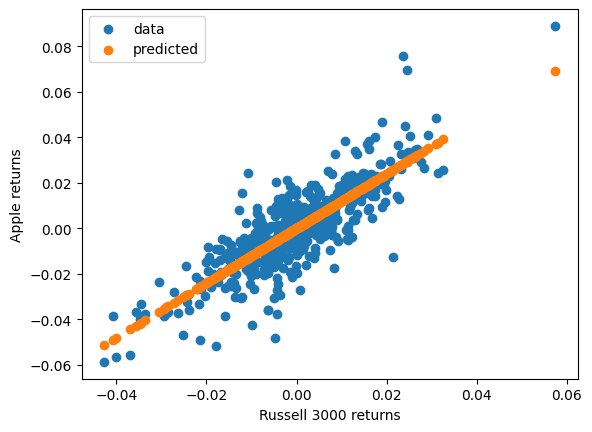

In [10]:
# import adjusted close prices
close_prices = pd.read_csv("../data/close_prices_small.csv", index_col = "date")
close_prices_rua = pd.read_csv("../data/close_prices_rua.csv", index_col="Date")
close_prices_all = close_prices_rua["Adj Close"].to_frame("RUA").merge(close_prices, left_index = True, right_index = True)
# calculate returns 
discrete_returns = close_prices_all.pct_change().dropna()
df = discrete_returns.loc[:, ["RUA", "AAPL"]]

# define the model
linear_regression = LinearRegression()
# fit the model
X, y = df[["RUA"]], df["AAPL"]
linear_regression.fit(X, y)
print(f"The estimated value for the constant is: {linear_regression.intercept_:.4f} and for beta it is: {linear_regression.coef_[0]:.4f}")
y_hat = linear_regression.predict(X)

fig, ax = plt.subplots()
# plot data
ax.scatter(X.values.flatten(), y, label = "data")
ax.scatter(X.values.flatten(), y_hat, label = "predicted")
ax.set_xlabel("Russell 3000 returns")
ax.set_ylabel("Apple returns")
ax.legend()
plt.show()

Let us practice how to use other models to demonstrate the similarity. You may or may not have heard about quantile regression before. It is implemented as a `QuantileRegressor` class in the `linear_model` module. In short, it predicts a quantile of the target variable instead of its expected values (as it is done for the linear regression model). By default, the median is predicted. As quantiles only depend on the ordering of the data instead of their values, quantile regression with the median is sometimes considered as the robust counterpart of traditional regression. See below that the quantile regression is done in almost the same way as the linear regression before. 

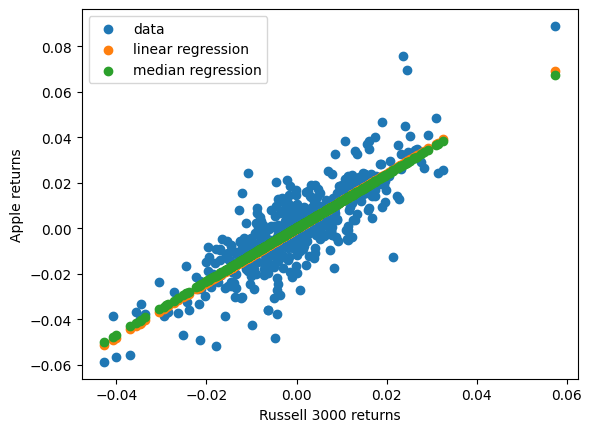

In [11]:
quantile_regressor = QuantileRegressor(quantile = 0.5, alpha = 0)
quantile_regressor.fit(X, y)
y_hat_median = quantile_regressor.predict(X)

fig, ax = plt.subplots()
# plot data
ax.scatter(X.values.flatten(), y, label = "data")
ax.scatter(X.values.flatten(), y_hat, label = "linear regression")
ax.scatter(X.values.flatten(), y_hat_median, label = "median regression")
ax.set_xlabel("Russell 3000 returns")
ax.set_ylabel("Apple returns")
ax.legend()
plt.show()


And as a further demonstration let us fit a model which is able to make non-linear predictions. For instance the gradient boosted regressor. As you can see, the pythonic part is always the same, only the name of the class differs.

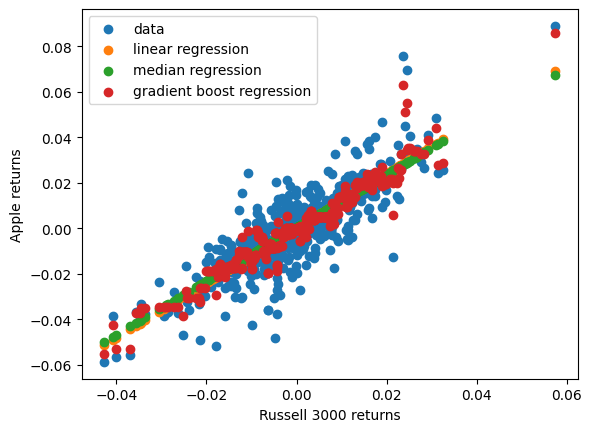

In [12]:
gbr = GradientBoostingRegressor()
gbr.fit(X, y)
y_hat_gbr = gbr.predict(X)
fig, ax = plt.subplots()
# plot data
ax.scatter(X.values.flatten(), y, label = "data")
ax.scatter(X.values.flatten(), y_hat, label = "linear regression")
ax.scatter(X.values.flatten(), y_hat_median, label = "median regression")
ax.scatter(X.values.flatten(), y_hat_gbr, label = "gradient boost regression")
ax.set_xlabel("Russell 3000 returns")
ax.set_ylabel("Apple returns")
ax.legend()
plt.show()

## Unsupervised learning with sklearn

Unsupervised learning is about learning structure and relationships within data instead of focusing on a target variable. For instance, we may want to extract the most relevant information (dimensionality reduction) or group observations in the data such that members of the same group have similar observations of all variables and different observations to members of other groups (clustering). The handling in sklearn is almost the same as for supervised learning algorithms, except for the fact that we only need to provide the data as input to the `fit` method. Again, let us take a look at some examples.

### PCA
We already learned about PCA which is implemented in the `decomposition` module of the sklearn package. By default, it takes care of mean standardization and extracts all principal components. Furthermore, instead of eigenvalue decomposition, it estimates the principal components by singular value decomposition. The `n_components` argument can be used to restrict the estimation to the desired number of components. Once, the model is estimated, several useful information can be found among the attributes of this class. The principal components are saved under the `components_` attribute. Furthermore, we can take a look at the explained variance and the explained variance ratio. The data can be transformed to the principal components scores by the `transform` method. 

/Users/ralfkellner/Documents/Kurse/SCDP/.venv/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: divide by zero encountered in matmul
  C = X.T @ X
/Users/ralfkellner/Documents/Kurse/SCDP/.venv/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: overflow encountered in matmul
  C = X.T @ X
/Users/ralfkellner/Documents/Kurse/SCDP/.venv/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: invalid value encountered in matmul
  C = X.T @ X


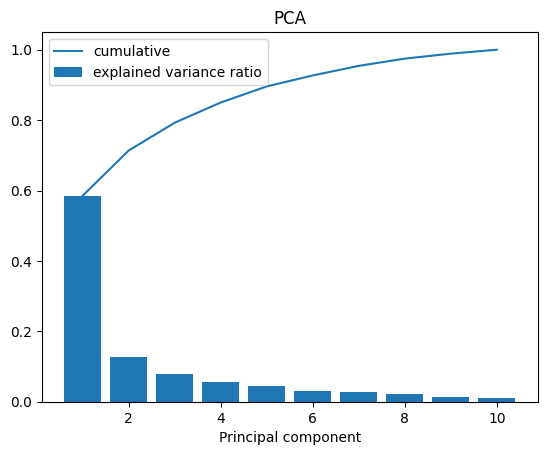

In [13]:
# import adjusted close prices
close_prices = pd.read_csv("../data/close_prices_small.csv", index_col = "date")
close_prices_rua = pd.read_csv("../data/close_prices_rua.csv", index_col="Date")
close_prices_all = close_prices_rua["Adj Close"].to_frame("RUA").merge(close_prices, left_index = True, right_index = True)
# calculate returns 
discrete_returns = close_prices_all.pct_change().dropna()
df = discrete_returns.drop(["RUA"], axis = 1)

pca = PCA()
pca.fit(df)

fig, ax = plt.subplots()
ax.bar(np.arange(1, df.shape[1]+1), pca.explained_variance_ratio_, label = "explained variance ratio")
ax.plot(np.arange(1, df.shape[1]+1), np.cumsum(pca.explained_variance_ratio_), label = "cumulative")
ax.set_title("PCA")
ax.set_xlabel("Principal component")
ax.legend()
plt.show()

One of the usages of PCA is to bring the original data to a lower dimensional representation in order to visualize it. Below you can see how we transform the data and visualize the first two principal component scores. 

/Users/ralfkellner/Documents/Kurse/SCDP/.venv/lib/python3.13/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/ralfkellner/Documents/Kurse/SCDP/.venv/lib/python3.13/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/ralfkellner/Documents/Kurse/SCDP/.venv/lib/python3.13/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encountered in matmul
  X_transformed = X @ self.components_.T


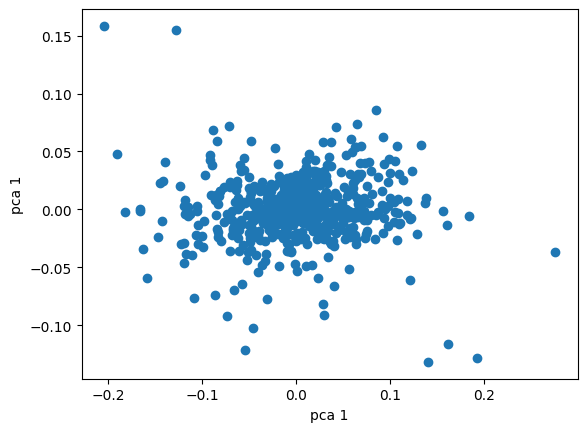

In [14]:
Z = pca.transform(df)
fig, ax = plt.subplots()
ax.scatter(Z[:, 0], Z[:, 1])
ax.set_xlabel("pca 1")
ax.set_ylabel("pca 1")
plt.show()

To interpret this plot for financial return data, it takes some detailed inspection of the results. First let us take a look the the loading from the first two principal components. 

In [15]:
pd.DataFrame(pca.components_.transpose()[:, :2], columns = ["pca_1", "pca_2"], index = df.columns)

,pca_1,pca_2
AAPL,0.232240,-0.007787
MSFT,0.246423,-0.108982
GOOGL,0.275136,-0.162611
TSLA,0.444172,0.787342
META,0.411633,-0.564749
AMZN,0.336148,-0.147337
NVDA,0.484429,0.020267
AVGO,0.265601,-0.006593
V,0.150158,-0.020232
XOM,0.046393,0.014150


We observe equal signs for the first principal component loadings. This means if the value of the corresponding score is positive, the companies had above average returns on that day and below average returns if the score is negative. The loadings from the second principal component score split the companies into two groups, where the one with negative signs is largely driven by Tesla as its absolute value is by far the largest. Thus, for the second principal component scores, we have a large positive value if Tesla has a large positive return. If you take a look at the scatter plot, you can see that we have two observations with high scores of the second principal component. Let us take a look a these days.

In [16]:
df[Z[:, 1] > 0.1]

,AAPL,MSFT,GOOGL,TSLA,META,AMZN,NVDA,AVGO,V,XOM
2022-02-03,-0.016720,-0.038952,-0.033176,-0.016032,-0.263901,-0.078128,-0.051264,-0.037419,-0.016481,-0.011660
2022-10-27,-0.030465,-0.019756,-0.028547,0.002003,-0.245571,-0.040636,0.021712,-0.012533,0.004721,0.003827


As you can see, it is true, on these days all companies experienced rather negative returns, however, among these companies, Tesla seems to have better days in comparison. Besides the visualization, principal component scores can be interpreted as systematic factors for the original variables. In the financial domain, factor models play a bigger role, if we want to examine what systematically impact individual developments of companies. Let us combine PCA with linear regression, to examine this for our dataset. We are going to use two components as well in order to visualize our result in a simple fashion afterwards. Note, we would rather use more factors in a more realistic scenario. In a loop we estimate betas for the following regression for every company $i$:

$$
r_{t, i} = \beta_0 + \beta_1 z_{t, 1} + \beta_2 z_{t, 2} + \epsilon_i
$$

However, as you can see below, the estimated betas are identical to the loadings which is not surprising as principal components are independent (so no interaction effects impact estimated betas) and the loadings are derived by minimizing the squared deviations of original variables and projections. The estimated intercept of these regressions are equal to the means of each company returns which are subtracted for mean normalization when performing pca. Thus, we can use the loadings to group companies according to their systematic exposure. 

Estimated betas:
         beta_1    beta_2
AAPL   0.232240 -0.007787
MSFT   0.246423 -0.108982
GOOGL  0.275136 -0.162611
TSLA   0.444172  0.787342
META   0.411633 -0.564749
AMZN   0.336148 -0.147337
NVDA   0.484429  0.020267
AVGO   0.265601 -0.006593
V      0.150158 -0.020232
XOM    0.046393  0.014150

Visualization:


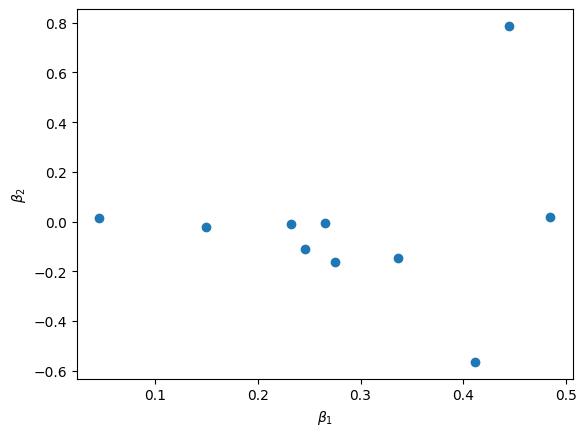

In [17]:
intercepts = []
betas = []

for company in df.columns:
    linear_regression = LinearRegression()
    linear_regression.fit(Z[:, :2], df[company].values)
    intercepts.append(linear_regression.intercept_)
    betas.append(linear_regression.coef_)

betas_df = pd.DataFrame(betas, index = df.columns, columns = [r"beta_1", "beta_2"])
print("Estimated betas:")
print(betas_df)
print("\nVisualization:")
fig, ax = plt.subplots()
ax.scatter(betas_df.iloc[:, 0], betas_df.iloc[:, 1])
ax.set_xlabel(r"$\beta_1$")
ax.set_ylabel(r"$\beta_2$")
plt.show()

With the systematic exposure (loadings of the first two principal components), we can take a look at another example for unsupervised learning, clustering, here for instance the k-means clustering. By now, you will have no problems doing this on your own by using the common syntax. However, if you do not know the details about the algorithm, results are hard to interpret. Below we see the rather less spectacular result that the companies are divided into Tesla and all other companies if the desired number of clusters would be equal to two. 

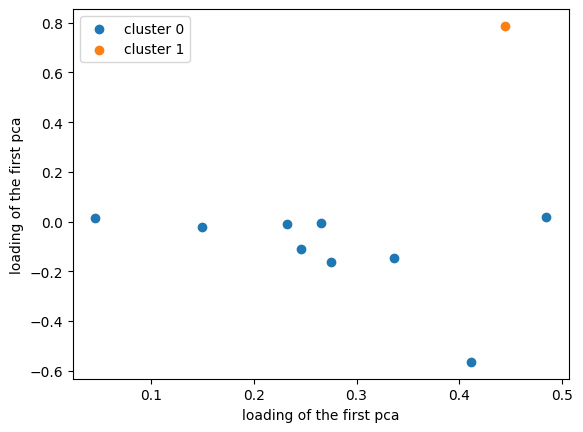

In [18]:
loadings = pd.DataFrame(pca.components_.transpose()[:, :2], columns = ["pca_1", "pca_2"], index = df.columns)
kmeans = KMeans(n_clusters = 2)
kmeans.fit(loadings)
kmeans.labels_


loadings.loc[:, "cluster"] = kmeans.labels_
fig, ax = plt.subplots()
for cluster in loadings.cluster.unique():
    ax.scatter(loadings[loadings.cluster == cluster].loc[:, "pca_1"], loadings[loadings.cluster == cluster].loc[:, "pca_2"], label = f"cluster {cluster}")
ax.set_xlabel(r"loading of the first pca")
ax.set_ylabel(r"loading of the first pca")
ax.legend()
plt.show()

Note that the number of groups should be determined in other ways which we are not going to discuss any further. However, one important aspect for this application should be mentioned. As PCA only mean centers the data by default, its input data is largely impacted by the individual variance of each company which is why Tesla is playing such a special role in our example as its variance is the largest among those companies. Usually, we are more interested in companies which play an important role with respect to the dependencies to other companies. We can shift the attention of the PCA towards this characteristic by standardizing the input data. See below how drastically this changes the loadings for the second principal component in our example. Now, ExxonMobil (XOM) exhibits the most distinct loading combination which is likely due to its rather low average correlation to the other companies. 

In [19]:
standard_scaler = StandardScaler()
pca = PCA()

df_s = standard_scaler.fit_transform(df)
pca.fit(df_s)

loadings = pd.DataFrame(pca.components_.transpose()[:, :2], columns = ["pca_1", "pca_2"], index = df.columns)
loadings

/Users/ralfkellner/Documents/Kurse/SCDP/.venv/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: divide by zero encountered in matmul
  C = X.T @ X
/Users/ralfkellner/Documents/Kurse/SCDP/.venv/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: overflow encountered in matmul
  C = X.T @ X
/Users/ralfkellner/Documents/Kurse/SCDP/.venv/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: invalid value encountered in matmul
  C = X.T @ X


,pca_1,pca_2
AAPL,0.363753,0.087873
MSFT,0.363638,-0.088218
GOOGL,0.350260,-0.109504
TSLA,0.276817,-0.032731
META,0.304486,-0.206002
AMZN,0.339513,-0.093976
NVDA,0.350872,-0.081487
AVGO,0.330279,0.055830
V,0.297413,0.243288
XOM,0.086663,0.922615


## Evaluation

In order to examine the performance of our models, we can make use of different [metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) which need to be selected in accordance with the aim of the analysis. Furthermore, to evaluate the generality of our model, we should evaluate our model to new and unseen data. In its simplest form, this can be done by splitting the data into two parts. One to train the model and one to test its performance for new and unseen data. Sklearn provides a `train_test_split` method in the `model_selection` module to split data. The arguments of this method allow us to shuffle the data or not, set a random state and set the size of the test data. Usually, one uses more data for training than for testing. Note, that this helps to train the model, however it induces greater variation in the performance evaluation of the test data. Loosely speaking, the smaller the number of observations, the higher the estimator's standard error. We demonstrate the train-test splitting in the cell below. 

In [20]:
X, y = make_regression(n_samples=500, n_features = 5, n_informative=2, noise = 10, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

y_train_hat = linear_regression.predict(X_train)
y_test_hat = linear_regression.predict(X_test)

r2_train = r2_score(y_train, y_train_hat)
r2_test = r2_score(y_test, y_test_hat)

print(f"R^2 for training data: {r2_train:.4f}, R^2 for test data: {r2_test:.4f}.")

R^2 for training data: 0.9905, R^2 for test data: 0.9923.


/Users/ralfkellner/Documents/Kurse/SCDP/.venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/ralfkellner/Documents/Kurse/SCDP/.venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/ralfkellner/Documents/Kurse/SCDP/.venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


However, the evaluation of the training data is largely impacted by the randomness of data and the corresponding split. To generate more stable evaluation of test data, one either uses some form of cross-validation which splits and evaluates the data multiple times. One popular choice is cross-fold validation which splits the data into $k$ equally sized folds and for $k$ times leaves one fold out as test data and uses the remaining ones for model estimation. The `KFold` class can be used to determine the indices of the folds. Given these indices we select training and test data, estimate the model and calculate the score of choice. Finally, the average test score is the score which we use. Either on a standalone basis if this is meaningful or for comparison to other models.

In [21]:
r2_train_folds, r2_test_folds = [], []
kfold = KFold()
for train_idx, test_idx in kfold.split(X):
    X_train, y_train = X[train_idx], y[train_idx]
    X_test, y_test = X[test_idx], y[test_idx]
    linear_regression = LinearRegression()
    linear_regression.fit(X_train, y_train)

    y_train_hat = linear_regression.predict(X_train)
    y_test_hat = linear_regression.predict(X_test)

    r2_train = r2_score(y_train, y_train_hat)
    r2_test = r2_score(y_test, y_test_hat)
    r2_train_folds.append(r2_train)
    r2_test_folds.append(r2_test)

train_cv_score = np.mean(r2_train_folds)
test_cv_score = np.mean(r2_test_folds)

print(f"The training cross validation score is: {train_cv_score:.4f}, the test cross validation score is: {test_cv_score:.4f}.")

The training cross validation score is: 0.9911, the test cross validation score is: 0.9907.


/Users/ralfkellner/Documents/Kurse/SCDP/.venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/ralfkellner/Documents/Kurse/SCDP/.venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/ralfkellner/Documents/Kurse/SCDP/.venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/ralfkellner/Documents/Kurse/SCDP/.venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/ralfkellner/Documents/Kurse/SCDP/.venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/ralfke

Note that test scores for each fold can be determined in a simpler way by using the `cross_val_score` method. See below how this works. Basically, we tell the method which model, which splitting instance and which data.

In [22]:
linear_regression = LinearRegression()
kfold = KFold()
cross_val_score(linear_regression, X, y, cv = kfold)

array([0.99169444, 0.99173572, 0.98872134, 0.99198814, 0.98956276])

An important aspect w.r.t. to the financial domain is the temporal structure in the data. Common cross-validation would not respect it and sometimes uses data from the future to make predictions for the past. As this is not realistic, one should respect the time structure when splitting the data. Two choices are common: (1) start with a minimum level of training data and add more data to training over time or (2) a rolling window which means at time $t$ we always use the same number of observations from the past to estimate the model and another fixed number of days in the future to evaluate the model.

Below, we regress Apple's stock returns on the Russell 3000 returns over time. We always use 252 days to estimate the model and evaluate its performance for the next 60 days. This means we approximately use one year of trading days for estimation and three months for testing. The results indicate two things: (1) Apple seems to decouple its development a little from the market as less variation can be explained by it more recently. (2) The beta, i.e., systematic exposure seems to vary over time as the test score ($R^2$) is much smaller for test data than for training data.

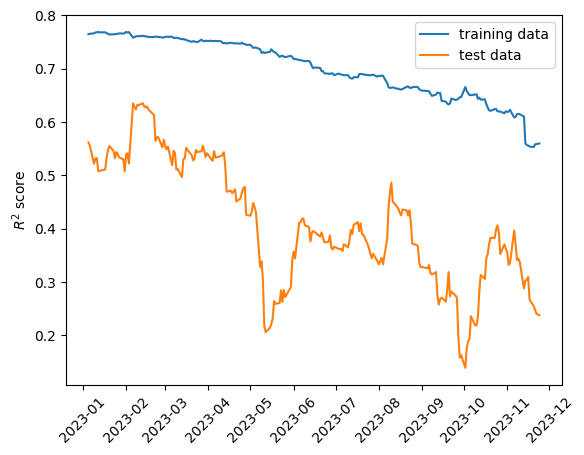

In [23]:
df = discrete_returns.loc[:, ["RUA", "AAPL"]]
X, y = df[["RUA"]], df["AAPL"]

training_size = 252
test_size = 60
t_splits = df.shape[0] - training_size - test_size

r2_train_folds, r2_test_folds = [], []
dates = []
for t in range(training_size, t_splits + training_size + 1, 1):
    df_train = df.iloc[(t - training_size): t]
    df_test = df.iloc[t:(t + test_size)]
    dates.append(df.iloc[t].name)
    X_train, y_train = df_train[["RUA"]], df_train["AAPL"]
    X_test, y_test = df_test[["RUA"]], df_test["AAPL"]
    linear_regression = LinearRegression()
    linear_regression.fit(X_train, y_train)

    y_train_hat = linear_regression.predict(X_train)
    y_test_hat = linear_regression.predict(X_test)
    r2_train = r2_score(y_train, y_train_hat)
    r2_test = r2_score(y_test, y_test_hat)
    r2_train_folds.append(r2_train)
    r2_test_folds.append(r2_test)

fig, ax = plt.subplots()
dates = pd.to_datetime(dates)
ax.plot(dates, r2_train_folds, label = "training data")
ax.plot(dates, r2_test_folds, label = "test data")
ax.tick_params(axis='x', labelrotation=45)
ax.set_ylabel(r"$R^2$ score")
ax.legend()
plt.show()

## Other packages for statistics and deep learning

Even though sklearn includes a great variety of methods from statistics and machine learning, we sometimes can and should use other packages. 